# Miary oceny klasyfikatora

W realnych problemach związanych z podejmowanie decyzji (np. klasyfikacja binarna) bardzo często różne błędy mają różną wagę. Przykład: orzekanie o winności podejrzanego -> skazanie niewinnej osoby jest uznawane za błąd dużo gorszy niż nie skazanie osoby winnej (w naszej kulturze).

Dlatego w praktyce data science bardzo ważne jest dobranie odpowiedniej miary do problemu (rozumienie celu biznesowego!). Procent poprawnych klasyfikacji (*accuracy*) często nie jest właściwą miarą.

W klasyfikacji binarnej w praktyce zawsze przyjmujemy, że klasa $1$ jest klasą wyróżnioną. Klasę $1$ nazywamy klasą "positive", a klasę $0$ - "negative".

### Podstawowe pojęcia:

<img src="Grafika/confusion_matrix.png" style="width: 400px;">


## Najczęsciej stosowane miary (oprócz accuracy)

**Precyzja** - mówi o tym, jak *precyzyjny* jest klasyfikator - tzn. jak często, to co klasyfikator wskazał jako pozytywne, w rzeczywistości jest pozytywne:

$$precision = \frac{TP}{TP + FP}$$

**Czułość** - mówi o tym, jak *czuły* jest klasyfikator - tzn. w jakim stopniu wykrywa obserwacje, które są pozytywne:

$$recall = \frac{TP}{TP+FN}$$

**Miara F1** - średnia harmoniczna z precyzji i czułości:

$$F1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \cdot \frac{precicion \cdot recall}{precision + recall}$$

*Do przemyślenia: dlaczego średnia harmoniczna, a nie po prostu średnia arytmetyczna?*

#### Zadanie

Do każdego przypadku zaproponuj miarę jakości klasyfikatora, którą powinniśmy maksymalizować.

- robot żołnierz
 - Mamy robota, którego wysyłamy na woję, żeby walczył z ludźmi. Robot opiera swoje działanie przy użyciu klasyfikatora: widząć jakiegoś człowieka klasyfikuje go jako "cywila" (0) lub "wrogiego żołnierza" (1), i w drugim przypadku strzela do niego.
- robot lekarz
 - Mamy automat, który na podstawie wyników badań przewiduje czy badany pacjent jest zagrożony pewną chorobą (1) czy nic mu nie grozi (0). Jeśli przewiduje, że tak, to kieruje pacjenta na dodatkowe badania dające pewny wynik.
- robot sędzia
 - Zamiast sędziego w sądzie pracuje robot, który klasyfikuje podejrzanych jako winnych (1) lub nie (0).
- wyszukiwanie informacji - klasyfikacja fragmentów tekstów jako istotne
 - mamy automat, który skanuje teksty pojawiające się w internecie i klasyfikuje poszczególne fragmenty jako dotyczące naszej firmy (1) lub nie (0), po to aby w zautomatyzowany sposób gromadzić wzmianki o naszej firmie. Później zgromadzone przez ten automat teksty trafiają do szefa, który zamierza je wszystkie przeczytać.

```
y_true             y_pred
1                  1          TP - true positive
1                  0          FN - false negative
0                  0          TN - true negative
0                  1          FP - false positive
```

In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [2]:
y_true = [0, 0, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1]

precision_score(y_true, y_pred)

1.0

In [3]:
y_true = [0, 0, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1]

# kolejność ma znaczenie(!) zawsze lepiej zajrzeć do dokumentacji jaka jest kolejność
precision_score(y_pred, y_true)

0.3333333333333333

In [4]:
y_true = [0, 0, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1]

# w populacji było 3 chorych, udało nam się znaleźć jednego
recall_score(y_true, y_pred)

0.3333333333333333

## Zwróćmy uwagę na to, że precision i recall mogą być niezdefiniowane w zdegenerowanych przypadkach

In [5]:
# precision jest nieokreślone gdy model nie zaklasyfikuje żadnej obserwacji jako 1

y_true = [0, 0, 1, 1, 1]
y_pred = [0, 0, 0, 0, 0]

precision_score(y_true, y_pred)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [6]:
# recall jest nieokreślone gdy nie ma w ogóle jedynek w populacji (tej prawdziwej)

y_true = [0, 0, 0, 0, 0]
y_pred = [0, 0, 0, 0, 1]

recall_score(y_true, y_pred)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0

In [8]:
y_true = [0, 0, 0, 1, 1]
y_pred = [0, 0, 0, 0, 1]

f1_score(y_true, y_pred)

0.6666666666666666

In [9]:
from sklearn.metrics import fbeta_score
y_true = [0, 0, 0, 1, 1] # lepszy recall (0.5), gorszy precision (0.33)
y_pred = [0, 1, 1, 0, 1]
fbeta_score(y_true, y_pred, beta=0.25) # faworyzuje precision

0.3399999999999999

In [10]:
from sklearn.metrics import fbeta_score
y_true = [0, 0, 0, 1, 1] # lepszy recall (0.5), gorszy precision (0.33)
y_pred = [0, 1, 1, 0, 1]
fbeta_score(y_true, y_pred, beta=4) # faworyzuje recall

0.4857142857142857

In [11]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5



# Czemu średnia harmoniczna, a nie znana i lubiana średnia arytmetyczna (chodzi o F-measure)?

In [16]:
# W przypadku, gdy jeden wynik (np. precision) jest wysoki,
# a drugi (np. recall) jest niski, to średnia arytmetyczna 
# da nam całkiem niezły wynik. Średnia harmoniczna zaś
# będzie ciążyć w stronę gorszego wyniku.
# Dzięki temu mamy pewność że wysoki wynik na F-measure
# świadczy o wysokich wartośćiach obu miar

y_true = [0,0,0,0,0,0,0,1]
y_pred = [1,1,1,1,1,1,1,1]

prec = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print(f"prec={prec}")
print(f"recall={recall}")
print(f"f1 (harmoniczna)={f1_score(y_true, y_pred)}") # nizsza
print(f"srednia arytmetyczna={(prec+recall)/2}") # wyzsza

prec=0.125
recall=1.0
f1 (harmoniczna)=0.2222222222222222
srednia arytmetyczna=0.5625


# Klasyfikator SVM - Support Vector Machines

*W sklearn: SVC.* 
*Po polsku: maszyna wektorów nośnych.*

![svm_intro1](Grafika/svm_intro1.jpg)
![svm_intro2](Grafika/svm_intro2.jpg)

Źródło: https://www.safaribooksonline.com/library/view/python-deeper-insights/9781787128576/ch03s04.html

### Matematyka

Zajmujemy się klasyfikacją binarną, ale przyjmujemy konwencję $Y\in \{-1,1\}$. 

Rozważmy przypadek, gdy dane są liniowo separowalne.

$ \mathbf{w} \cdot \mathbf{x} = 0$ - równanie opisujące linię (hiperpłaszczyznę) rozdzielającą;

$
\begin{equation}
  \left.\begin{aligned}
  \mathbf{w} \cdot \mathbf{x} - b & = 1\\
  \mathbf{w} \cdot \mathbf{x} - b & = -1
\end{aligned}\right\} \text{- równania marginesów.}
\end{equation}
$

Zatem SVM szuka takiej płaszczyzny (parametrów $\mathbf{w}, b$), dla której:

$
\begin{equation}
  \begin{aligned}
  \mathbf{w} \cdot x_i - b & \geq 1, \ \ \text{ gdy } \ y_i = 1, \\
  \mathbf{w} \cdot x_i - b & \leq -1 \ \ \text{ gdy } \ y_i = -1,
\end{aligned}
\end{equation}
$

Co można zapisać w skrócie warunkiem:

$y_i ( \mathbf{w} \cdot x_i - b) \geq 1.$

A ponieważ odległość między marginesami (grubość płaszczyzny rozdzielającej klasy) wynosi $\frac{2}{\|\mathbf{w}\|}$, to ostatecznie uczenie klasyfikatora SVM można zdefiniować jako:

$$
\begin{equation}
  \begin{aligned}
  \text{zminimalizuj } & \ \ \ \|\mathbf{w}\|, \\ 
  \text{przy ograniczeniu: } & \ \ \ y_i ( \mathbf{w} \cdot x_i - b) \geq 1, \ \ \ i = 1, \ldots, n.
\end{aligned}
\end{equation}
$$

## Dane nieseparowalne 

![svm_intro1](Grafika/svm_nonlinear0.png)
Źródło: http://inspirehep.net/record/1265323/plots

Definiujemy zawiasową funkcję straty (*hinge loss*):

$\zeta _{i} = \max{(0, 1 - y_i ( \mathbf{w} \cdot x_i - b))}.$

Funkcja ta przyjmuje wartość $0$, gdy obserawcja $x_i$ leży po właściwej stronie hiperpłaszczyzny rozdzielającej, oraz jej wartość jest proporcjonalna do odległości do płaszczyzny w przypadku, gdy punkt leży po złej stronie.

Uczenie klasyfikatora definiujemy jako minimalizacja funkcji:

$$\bigg[\frac {1}{n}\sum\limits_{i=1}^{n}\max (0,1-y_{i}({\mathbf {w}}\cdot {\mathbf {x}}_{i}-b) )\bigg] + \lambda \| {\mathbf {w}}\| ^{2}.$$

Czyli jednocześnie maksymalizujemy odległość między marginesami (minimalizujemy $\| {\mathbf {w}}\|$) oraz minimalizujemy karę za punkty leżące po złej stronie. $\lambda$ - współczynnik ważący składowe opytmalizowanej funkcji.

Uwaga: tak samo jak w regresji logistycznej w sklearn pojawia się parametr `C` - odpowiada on wartości $\frac{1}{\lambda}$. Zatem: im większe `C`, tym mniejszą wagę przywiązujemy do szerokości marginesu, a większą do położenia punktów po właściwych stronach, czyli margines będzie węższy ale lepiej dopasowany.

<br>
**Uwaga 1**: Czy SVM da nam prawdopodobieństwo przynależenia obserwacji do klas (jak $\pi(x)$ w regresji logistycznej, czy empiryczny procent klas w liściu w drzewie decyzyjnym?

<br>

Z definicji nie. Ale w praktyce się to robi. Przyjmuje się, że $P(Y=1 \mid x) = \text{sigmoid}(x) = \frac{1}{1+e^{-d(x)}}$, gdzie $d(x)$ - odległość punktu $x$ od hiperpłaszczyzny rozdzielającej. W `sklearn` musimy ustawić w konstruktorze SVC parametr `probability=True`, jeśli chcemy żeby klasyfikator wyliczył te prawdopodobieństwa.

<br>
**Uwaga 2**: Czy SVM można zastosować do klasyfikacji wieloklasowej?

<br>

Tak jak w regresji logistycznej, klasyfikator jest zdefiniowany dla problemu klasyfikacji binarnej, ale w praktyce oczywiście jest na to sposób i to się robi. Wykorzystuje się schemat *one-vs-one*.

<br>

**Uwaga 3**: Czy SVM wymaga jakiegoś przygotowania danych?

Tak - skalowanie.


## Kernels

#### Jak można wykorzystać SVM do klasyfikacji w przypadku danych nieliniowych.

![svm_intro1](Grafika/svm_nonlinear1.png)

Rozważmy rysunek B. W przedstawionych danych mamy dwie zmienne: $x_1, x_2$. Czy da się zastosować tutaj klasyfikator SVM?

<br>

<br>

Rozszerzmy ręcznie zbiór danych do następujących zmiennych:

$$x_1, x_2, x_1^2, x_2^2.$$

Gdybyśmy do takich zmiennych zastosowali SVM na tym zbiorze, to jak mogłaby wyglądać płaszczyzna rozdzielająca? Na przykład tak:

$$ 0 \cdot x_1 + 0 \cdot x_2 + a \cdot x_1^2 + b \cdot x_2^2 + c= 0.$$

Czyli $\mathbf{w} = [0, 0 , a, b]$.

Wszystko fajnie, ale skąd mamy wiedzieć jakie przekształcenia zmiennych dodać (np. na rysunku poniżej - pomijając już nawet fakt, że w rzeczywistych danych nawet nie będziemy w stanie spojrzeć na jakikolwiek rysunek...)? Możemy dodać dla każdej zmiennej dużo różnych transformacji, ale jeśli zmiennych pierwotnie będzie dużo, to z transfromacjami będzie ich $\text{dużo}^2$...

![svm_intro1](Grafika/svm_nonlinear2.png)

Wróćmy do uczenia klasyfikatora, czyli rozwiązywania problemu optymalizacyjnego. 

Przyjmując oznaczenie $\zeta _{i}=\max (0,1-y_{i}(\mathbf{w}\cdot x_{i}-b))$, można go alternatywnie zapisać w postaci:

$$
\begin{equation}
  \begin{aligned}
  \text{zminimalizuj } & \ \ \ \frac {1}{n}\sum\limits_{i=1}^{n} \zeta_i + \lambda \|\mathbf{w}\|^2, \\ 
  \text{przy ograniczeniu: } & \ \ \ y_i ( \mathbf{w} \cdot x_i - b) \geq 1 - \zeta_i \ \text{oraz} \ \zeta_i \geq 0, \ \ \ i = 1, \ldots, n.
\end{aligned}
\end{equation}
$$


Okazuje się (matematyka wyższa...), że problem ten można sformułować równoważnie jako problem maksymalizacji funkcji:


$$f(c_1 \ldots c_n) = \sum\limits_{i=1}^n c_i - \frac{1}{2}\sum\limits_{i=1}^n \sum\limits_{j=1}^n y_i c_i (x_i\cdot x_j) y_j c_j,
$$

przy pewnych ograniczeniach, dla pewnych $c_1, \ldots, c_n$ (i tak się to w rzeczywistości odbywa). Widzimy zatem, że rozwiązanie zależy od iloczynów skalarnych obserwacji $x_i\cdot x_j$.

Rozważmy transformacje zmiennych i iloczyny sklarne. Przyjmijmy, że mamy dwie zmienne oryginalne: $x_1, x_2$. Załóżmy, że transformujemy dane do $x_1^2, x_1x_2, x_2x_1, x_2^2$. Czyli mamy przekształcenie $f(x_1,x_2) = (x_1^2, x_1x_2, x_2x_1, x_2^2)$. Weźmy przykładowo dwie obserwacje $a = (2,3), b = (4,5)$. Obserwacje te w nowej przestrzeni mają postać $f(a) = (4,6,6,9), \ f(b) = (16,20,20,25)$. Przeanalizujmy iloczyn skalarny:

$f(a) \cdot f(b) = 4 \cdot 16 + 6 \cdot 20 + 6 \cdot 20 + 9 \cdot 25 = 529$.

Teraz rozważmy funkcję $K(a) = a^2$ i spójrzmy na wynik działania tej funkcji na iloczynie $a \cdot b$:

$K(a \cdot b) = K(2 \cdot 4 + 3 \cdot 5) = (2 \cdot 4 + 3 \cdot 5)^2 = (2 \cdot 4)^2 + (2 \cdot 4 \cdot 3 \cdot 5) +  (2 \cdot 4 \cdot 3 \cdot 5) + (3 \cdot 5)^2 = 4 \cdot 16 + 6 \cdot 20 + 6 \cdot 20 + 9 \cdot 25 = 529$.

Wniosek?

<br>

<br>

Zamiast transformować zmienne, wystarczy użyć pewnego przekształcenia $K(x_i \cdot x_j)$ zamiast surowych iloczynów $x_i \cdot x_j$.

Dzięki temu:
- koszt obliczeniowy jest dużo mniejszy.
- pozbywamy się problemu szukania transformacji - w miejsce tego testujemy kilka przekształceń $K$.

$K$ jest zwane **jądrem** (funkcją jądrową, ang. *kernel*).


Jądra w sklearn:

http://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [5]:
from sklearn.svm import SVC

In [ ]:
?SVC

# Rysowanie SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x1_0 = np.random.normal(size=100, loc=0.5, scale=0.1)
x2_0 = np.random.normal(size=100, loc=0.5, scale=0.1)

x1_1 = np.r_[np.random.uniform(size=100, low = -0.1, high=0.1),
     np.random.uniform(size=100, low = 0.9, high=1.1),
     np.random.uniform(size=100, low = 0, high=1),
     np.random.uniform(size=100, low = 0, high=1)]
x2_1 = np.r_[np.random.uniform(size=100, low = 0, high=1),
            np.random.uniform(size=100, low = 0, high=1),
            np.random.uniform(size=100, low = 0.8, high=1.2),
            np.random.uniform(size=100, low = -0.1, high=0.1)]

y = np.r_[np.repeat(0, 100), np.repeat(1, 400)]

dane = pd.DataFrame({"x1" : np.r_[x1_0, x1_1], "x2": np.r_[x2_0, x2_1], "y": y})

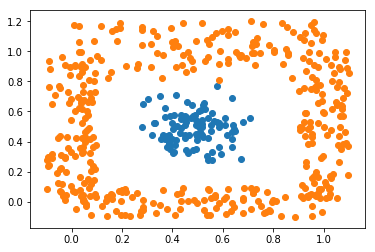

In [2]:
plt.scatter(x1_0,x2_0)
plt.scatter(x1_1,x2_1)
plt.show()

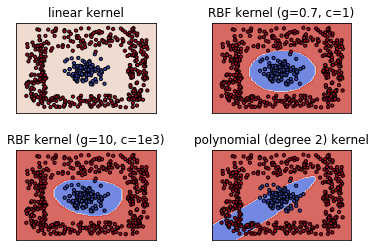

In [60]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
from sklearn.svm import SVC

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = dane.iloc[:, :2].values
y = dane.y

models = (SVC(kernel='linear', C=1e3),
          SVC(kernel='rbf', gamma=0.7, C=1),
          SVC(kernel='rbf', gamma=10, C=1e3),
          SVC(kernel='poly', degree=2, C=1e3))
models = (clf.fit(X, y) for clf in models)

titles = ('linear kernel',
          'RBF kernel (g=0.7, c=1)',
          'RBF kernel (g=10, c=1e3)',
          'polynomial (degree 2) kernel')

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=10, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

## Co SVM ma wspólnego z regresją logistyczną?

### Reguła decyzyjna w SVM:

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy }\mathbf{w} \cdot x_i  \geq 0, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy }\mathbf{w} \cdot x_i  < 0.
\end{aligned}
\end{equation}
$


### Reguła decyzyjna w regresji logistycznej

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy }\frac{1}{1+e^{-\beta x_i}} \geq 0.5, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy } \frac{1}{1+e^{-\beta x_i}} < 0.5,
\end{aligned}
\end{equation}
$

Jest ona równoważna regule:

$
\begin{equation}
  \begin{aligned}
  \hat{y_i} =  & \ \ \ \ 1, \ \ \text{ gdy } \beta x_i \geq 0, \\
  \hat{y_i} = & - 1, \ \ \text{ gdy } \beta x_i < 0.
\end{aligned}
\end{equation}
$

Czyli oba klasyfikatory mają identyczną postać reguły decyzyjnej: __liniową__.

Klasyfikatory o takiej postaci reguły decyzyjnej nazywają się klasyfikatorami liniowymi. Różnią się one sposobem wyznaczania hiperpłaszczyzny (np. prostej w przypadku 2D) rozdzielającej.

Uwaga: pomimo tego, że są to klasyfikatory liniowe, to można objąć nimi nieliniowość (transformacje zmiennych, czy kernel trick w svm).

<br>

<br>

<br>

### Zadanie 1

Rozszerzyć analizę porównawczą klasyfikatorów z poprzednich zajęć o klasyfikator SVM (w szukaniu optymalnych parametrów uwzględnić różne jądra).

### Zadanie 2

Dodać do analizy benchmarki klasyfikatorów: czas uczenia oraz czas predykcji.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

import pprint
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.metrics import accuracy_score
import pandas as pd

sms = pd.read_table('Dane/sms.tsv', header=None, names=['label', 'message'])
sms["label"] = sms.label.map({"ham": 0, "spam": 1})

X_train, X_test, y_train, y_test = train_test_split(sms.message, sms.label, 
                                                    test_size=1000, 
                                                    random_state=456)

pipe = Pipeline([("count", CountVectorizer()),
                 ("regresja", LogisticRegression(solver="liblinear"))])
pipe.fit(X_train, y_train)

print(f"baseline = {accuracy_score(pipe.predict(X_test), y_test)}")

modele = (

#     (pipe,parametry),
    (Pipeline([("count", CountVectorizer()), ("regresja", LogisticRegression(solver="liblinear"))]),
    {"count__stop_words": ["english", None],
    "regresja__penalty": ["l1", "l2"],
    "regresja__C": [0.01, 0.1, 1, 10, 100]}),
    
    (Pipeline([("count", CountVectorizer()), ("scaler", StandardScaler(with_mean=False)), ("regresja", LogisticRegression(solver="liblinear"))]),
    {"count__stop_words": ["english", None],
     "scaler__with_std" : [True, False],
    "regresja__penalty": ["l1", "l2"],
    "regresja__C": [0.01, 0.1, 1, 10, 100]}),
    
    (Pipeline([("count", CountVectorizer()), ("drzewo", DecisionTreeClassifier())]),
    {"drzewo__criterion": ["gini", "entropy"],
    "drzewo__max_depth": [2, 5, 10, 15, None]}),
    
    (Pipeline([("count", CountVectorizer(stop_words="english")),("bayes", MultinomialNB())]),
    {"bayes__alpha": [0.3, 0.5, 0.8],
    "bayes__fit_prior": [True, False]}),
    
    (Pipeline([("count", CountVectorizer(stop_words="english")), ("scaler", StandardScaler(with_mean=False)), ("SVC", SVC())]),
    [{"count__stop_words": ["english", None], "SVC__kernel": ["linear", "sigmoid"]},
     {"count__stop_words": ["english", None], "SVC__kernel": ["poly"], "SVC__degree": [2,3,4]},
     {"count__stop_words": ["english", None], "SVC__kernel": ["rbf"], "SVC__gamma": [0.1, 1, 10]}
    ])
)

# w pętli uruchomić dla każdego modelu GridSearchCV
# zapamiętać najlepsze modele/parametry dla każdego modelu

print("Tunowanie")
najlepsze = []
for model, parametry in modele:
    print(model.steps[-1][0])
    gs = GridSearchCV(model, parametry, cv=5, verbose=2, n_jobs=3)
    # tutaj następuje podział na część treningową i walidacyjną
    # całe te dane, X_train, więc także ta część walidacyjna,
    # bierze udział w "meta-nauce" parametrów modelu, np. C w regresji
    # więc są to dane "skażone", dlatego wydzieliliśmy też osobno X_test,
    # na którym ostatecznie to testujemy
    gs.fit(X_train, y_train)
    najlepsze.append(gs.best_estimator_)
    print(gs.best_params_)
    
print("\nTestowanie")
# uruchomić każdego najlepszego na danych testowych
for model in najlepsze:
    print(model.steps[-1][0])
    print(accuracy_score(model.predict(X_test), y_test))

baseline = 0.976
Tunowanie
regresja
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    5.9s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   12.6s finished


{'count__stop_words': None, 'regresja__C': 100, 'regresja__penalty': 'l2'}
regresja
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:   15.1s
[Parallel(n_jobs=3)]: Done 200 out of 200 | elapsed:   20.0s finished


{'count__stop_words': None, 'regresja__C': 100, 'regresja__penalty': 'l2', 'scaler__with_std': False}
drzewo
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    4.2s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    6.2s finished


{'drzewo__criterion': 'gini', 'drzewo__max_depth': None}
bayes
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    2.7s finished


{'bayes__alpha': 0.8, 'bayes__fit_prior': True}
SVC
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   23.0s
[Parallel(n_jobs=3)]: Done  80 out of  80 | elapsed:  1.3min finished
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


{'SVC__kernel': 'sigmoid', 'count__stop_words': None}

Testowanie
regresja
0.982
regresja
0.982
drzewo
0.97
bayes
0.979
SVC
0.977


# Lasy losowe

Wyobraźmy sobie, że mamy 100 klasyfikatorów i każdy z nich potrafi przewidywać $Y$ ze skutecznością $70\%$. Pytanie: jaką skuteczność będzie miała procedura klasyfikacyjna polegająca na dokonaniu predykcji każdym klasyfikatorem, a następnie podjęcie ostatecznej decyzji demokratycznie - czyli finalna decyzja to klasa dominująca wśród predykcji tych stu klasyfikatorów?

Jeżeli każdy klasyfikator ma skuteczność $70\%$, to średnio 70 ze 100 klasyfikatorów podejmie prawidłową decyzję. Jakie jest prawdopodobieństwo, że więcej niż 50 się pomyli? 

Bardzo małe... Zatem mamy doskonałą metodę klasyfikacji: nauczmy dużo modeli i klasyfikujmy demokratycznie!

Zatem po co ogóle uczyć się uczenia maszynowego, skoro możemy załatwić wszystko w ten prosty sposób?

<br>

<br>


Po to, bo jest jeden haczyk: **niezależność**...

Tak pięknie byłoby, gdyby te wszystkie klasyfikatory były niezależne. A nie są... Rozważmy sytuację, w które nauczyliśmy dwa modele: regresję logistyczną i SVM. Na czym polega zależność między tymi klasyfikatorami?

1. Oba klasyfikatory uczone są na tych samych zmiennych - zatem wykryją podobne zależności w danych, co przekłada się na podobieństwo predykcji.

2. Oba klasyfikatory są nauczone na tych samych obserwacjach.

Ponadto w tym konkretnym przypadku oba klasyfikatory są to klasyfikatory liniowe, zatem podejmują decyzję na podstawie płaszczyzny rozdzielającej. Te płaszczyzny mogą być bardzo podobne... A nawet jeśli nie są bardzo podobne, to i tak predykcje obu klasyfikatorów w praktyce będą silnie skorelowane, tzn. oba klasyfikatory będą dawały bardzo podobne predykcje...

Co możemy na to poradzić?

- każdy klasyfikator uczyć na innych zmiennych -> w praktyce losowe podzbiory, 
- każdy klasyfikator uczyć na innym podzbiorze obserwacji (w praktyce ma to mniejsze znaczenie).

W obu przypadkach pojedyncze klasyfikatory będą słabsze (bo wykorzystują mniej informacji), ale globalnie to pomoże!

Czy dwa powyższe zabiegi zapewniają niezależność klasyfikacji między poszczególnymi klasyfikatorami?

Nie, bo:
- nawet jak różne klasyfikatory uczymy na różnych zmiennych, to te zmienne będą z reguły zależne. Do tego w praktyce i tak nie jesteśmy w stanie nauczyć poszczególnych modeli na rozłącznych zbiorach zmiennych, bo musielibyśmy mieć tych zmiennych bardzo dużo (no chyba, że w każdym modelu wykorzystamy bardzo mało zmiennych, ale wtedy te modele będą słabe),
- nawet jak uczymy na różnych obserwacjach, to i tak w tych obserwacjach będą ukryte te same wzorce, które będą wykrywały modele.


### Lasy losowe - komitet drzew uczonych na różnych podzbiorach zmiennych i (ewentualnie) obserwacji.

Na marginesie: ciekawostką jest, że w praktyce przyjęło się, że mówiąc "lasy losowe" mamy na myśli **jeden** klasyfikator, czyli tak naprawdę "LAS losowy".

W sklearn las losowy zdefiniowany jest trochę inaczej:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
?RandomForestClassifier

W sklearnie drzewa nie są uczone na podzbiorach zmiennych. Randomizacja jest realizowana przez próbkowanie obserwacji (i ewentualnie ograniczanie przeszukiwania podziałów do losowego podzbioru zmiennych o zadanej liczbie).

Opisaną powyżej wersję lasu losowego można otrzymać wykorzystując `BaggingClassifier` 

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
?BaggingClassifier

# Pokaz mocy niezależnych klasyfikatorów

In [27]:
import scipy
p = 0.65 # prawdopodobieństwo sukcesu
n = 100

# jakie są szanse, że w n próbach będzie ponad połowa sukcesów?

s = 0
for k in range(n//2+1, n+1):
    # w tej wersji z definicji, poniżej przy użyciu gotowej funkcji
    p_k = scipy.special.binom(n,k) * p ** k * (1-p)**(n-k)
    s += p_k
    
s

0.998549438523441

In [28]:
import scipy
p = 0.65 # prawdopodobieństwo sukcesu
n = 100

# jakie są szanse, że w n próbach będzie ponad połowa sukcesów?

s = 0
for k in range(n//2+1, n+1):
    p_k = scipy.stats.binom.pmf(k,n,p)
    s += p_k
    
s

0.9985494385234139

#### Zadanie

Zrealizować przy użyciu tej klasy las losowy o nominalnej definicji:
- każde drzewo uczone jest na losowym podzbiorze zmiennych (np połowie),
- każde drzewo uczone jest na losowym podzbiorze obserwacji (np. połowie),
- obserwacje losowane są bez powtórzeń.

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
model = BaggingClassifier(DecisionTreeClassifier(),
                          max_samples=0.5, 
                          max_features=0.5,
                          bootstrap=False)

#### Zadanie

Rozszerz poprzednią analizę o model "RandomForest" z sklearn oraz o las losowy zdefiniowany przy użyciu "BaggingClassifier".

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

import pprint
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.metrics import accuracy_score
import pandas as pd

sms = pd.read_table('Dane/sms.tsv', header=None, names=['label', 'message'])
sms["label"] = sms.label.map({"ham": 0, "spam": 1})

X_train, X_test, y_train, y_test = train_test_split(sms.message, sms.label, 
                                                    test_size=1000, 
                                                    random_state=456)

pipe = Pipeline([("count", CountVectorizer()),
                 ("regresja", LogisticRegression(solver="liblinear"))])
pipe.fit(X_train, y_train)

print(f"baseline = {accuracy_score(pipe.predict(X_test), y_test)}")

modele = (

#     (pipe,parametry),
#     (Pipeline([("count", CountVectorizer()), ("regresja", LogisticRegression(solver="liblinear"))]),
#     {"count__stop_words": ["english", None],
#     "regresja__penalty": ["l1", "l2"],
#     "regresja__C": [0.01, 0.1, 1, 10, 100]}),
    
#     (Pipeline([("count", CountVectorizer()), ("scaler", StandardScaler(with_mean=False)), ("regresja", LogisticRegression(solver="liblinear"))]),
#     {"count__stop_words": ["english", None],
#      "scaler__with_std" : [True, False],
#     "regresja__penalty": ["l1", "l2"],
#     "regresja__C": [0.01, 0.1, 1, 10, 100]}),
    
#     (Pipeline([("count", CountVectorizer()), ("drzewo", DecisionTreeClassifier())]),
#     {"drzewo__criterion": ["gini", "entropy"],
#     "drzewo__max_depth": [2, 5, 10, 15, None]}),
    
#     (Pipeline([("count", CountVectorizer(stop_words="english")),("bayes", MultinomialNB())]),
#     {"bayes__alpha": [0.3, 0.5, 0.8],
#     "bayes__fit_prior": [True, False]}),
    
#     (Pipeline([("count", CountVectorizer(stop_words="english")), ("scaler", StandardScaler(with_mean=False)), ("SVC", SVC())]),
#     [{"count__stop_words": ["english", None], "SVC__kernel": ["linear", "sigmoid"]},
#      {"count__stop_words": ["english", None], "SVC__kernel": ["poly"], "SVC__degree": [2,3,4]},
#      {"count__stop_words": ["english", None], "SVC__kernel": ["rbf"], "SVC__gamma": [0.1, 1, 10]}
#     ]),
    
#     (Pipeline([("count", CountVectorizer(stop_words="english")), ("RandomForest", RandomForestClassifier())]),
#     {"RandomForest__n_estimators": [1,10,100]}),
    
    (Pipeline([("count", CountVectorizer(stop_words="english")), ("BaggingClassifier_drzewo", BaggingClassifier(DecisionTreeClassifier()))]),
    {"BaggingClassifier_drzewo__n_estimators": [10,100],
     "BaggingClassifier_drzewo__max_samples" : [0.2, 1.0],
     "BaggingClassifier_drzewo__max_features" : [0.2,  1.0],
     "BaggingClassifier_drzewo__bootstrap" : [True],
     "BaggingClassifier_drzewo__base_estimator__max_depth" : [None, 2, 4]
    }),
    
    (Pipeline([("count", CountVectorizer(stop_words="english")), ("BaggingClassifier_regresja", BaggingClassifier(LogisticRegression()))]),
    {"BaggingClassifier_regresja__n_estimators": [10,100],
     "BaggingClassifier_regresja__max_samples" : [0.2, 1.0],
     "BaggingClassifier_regresja__max_features" : [0.2, 0.8],
     "BaggingClassifier_regresja__bootstrap" : [True],
     "BaggingClassifier_regresja__base_estimator__C" : [0.1, 1, 10],
     "BaggingClassifier_regresja__base_estimator__penalty" : ["l1", "l2"]
    })
)

# w pętli uruchomić dla każdego modelu GridSearchCV
# zapamiętać najlepsze modele/parametry dla każdego modelu

print("Tunowanie")
najlepsze = []
for model, parametry in modele:
    print(model.steps[-1][0])
    gs = GridSearchCV(model, parametry, cv=3, verbose=2, n_jobs=3)
    # tutaj następuje podział na część treningową i walidacyjną
    # całe te dane, X_train, więc także ta część walidacyjna,
    # bierze udział w "meta-nauce" parametrów modelu, np. C w regresji
    # więc są to dane "skażone", dlatego wydzieliliśmy też osobno X_test,
    # na którym ostatecznie to testujemy
    gs.fit(X_train, y_train)
    najlepsze.append(gs.best_estimator_)
    print(gs.best_params_)
    
print("\nTestowanie")
# uruchomić każdego najlepszego na danych testowych
for model in najlepsze:
    print(model.steps[-1][0])
    print(accuracy_score(model.predict(X_test), y_test))

baseline = 0.976
Tunowanie
BaggingClassifier_drzewo
Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   33.5s
[Parallel(n_jobs=3)]: Done  72 out of  72 | elapsed:   44.2s finished


{'BaggingClassifier_drzewo__base_estimator__max_depth': None, 'BaggingClassifier_drzewo__bootstrap': True, 'BaggingClassifier_drzewo__max_features': 1.0, 'BaggingClassifier_drzewo__max_samples': 1.0, 'BaggingClassifier_drzewo__n_estimators': 100}
BaggingClassifier_regresja
Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   13.0s
[Parallel(n_jobs=3)]: Done 144 out of 144 | elapsed:  1.6min finished
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'BaggingClassifier_regresja__base_estimator__C': 10, 'BaggingClassifier_regresja__base_estimator__penalty': 'l1', 'BaggingClassifier_regresja__bootstrap': True, 'BaggingClassifier_regresja__max_features': 0.8, 'BaggingClassifier_regresja__max_samples': 1.0, 'BaggingClassifier_regresja__n_estimators': 100}

Testowanie
BaggingClassifier_drzewo
0.975
BaggingClassifier_regresja
0.982


# Zmienne jakościowe - jak kodować?

In [34]:
import pandas as pd
ramka = pd.DataFrame({"Kolor":["Blondyn", "Brunet", "Blondyn", "Szatyn", "Szatyn"],
                      "Wartosci":[1.24,2.56,3.45,6.54,7.68]})
#ramka.Kolor = pd.Categorical(ramka.Kolor)
ramka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
Kolor       5 non-null object
Wartosci    5 non-null float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [36]:
ramka

,Kolor,Wartosci
0,Blondyn,1.24
1,Brunet,2.56
2,Blondyn,3.45
3,Szatyn,6.54
4,Szatyn,7.68


## Podejście 1: get_dummies()

In [37]:
data = pd.get_dummies(ramka)
data

,Wartosci,Kolor_Blondyn,Kolor_Brunet,Kolor_Szatyn
0,1.24,1,0,0
1,2.56,0,1,0
2,3.45,1,0,0
3,6.54,0,0,1
4,7.68,0,0,1


In [40]:
data = pd.get_dummies(ramka, drop_first=True)
data

,Wartosci,Kolor_Brunet,Kolor_Szatyn
0,1.24,0,0
1,2.56,1,0
2,3.45,0,0
3,6.54,0,1
4,7.68,0,1


## Podejście 2: LabelEncoder, OneHotEncoder

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [42]:
ramka = pd.DataFrame({"Kolor":["Blondyn", "Brunet", "Blondyn", "Szatyn", "Szatyn"], "Wartosci":[1.24,2.56,3.45,6.54,7.68]})
# ramka.Kolor = pd.Categorical(ramka.Kolor)
ramka.select_dtypes(include=[object])

,Kolor
0,Blondyn
1,Brunet
2,Blondyn
3,Szatyn
4,Szatyn


In [43]:
ramka = pd.DataFrame({"Kolor":["Blondyn", "Brunet", "Blondyn", "Szatyn", "Szatyn"], "Wartosci":[1.24,2.56,3.45,6.54,7.68]})
# ramka.Kolor = pd.Categorical(ramka.Kolor)

# tak naprawdę ten przykład trochę nie ma sensu:
# w przypadku kolorów włosów nie ma sensu dawać liczb typu 0, 1, 2, 3...
# bo sugerujemy, że włosy 0 są bliżej do włosów 1, niż do włosów 2 (a tak nie jest)
# Ten przykład lepiej by działał dla wykształcenia, wag bokserskich (gdzie można
# wprowadzić pewien porządek, że coś jest mniejsze od czegoś, np. wykształcenie średnie
# od wyższego)
le = LabelEncoder()
ramka.Kolor = le.fit_transform(ramka.Kolor)
# ramka = ramka.apply(le.fit_transform) # cała ramka
ramka

,Kolor,Wartosci
0,0,1.24
1,1,2.56
2,0,3.45
3,2,6.54
4,2,7.68


In [49]:
enc = OneHotEncoder(handle_unknown='ignore', categorical_features=[0], sparse=False)
# sparse to ta sama rzadkość co przy zliczaniu słów wczoraj: czyli jak czujemy,
# że będzie mnóstwo zer, to macierz rzadka, żeby oszczędzać pamięć (przechowujemy
# informację tylko o wartościach niezerowych)
enc.fit(ramka)
enc.transform(ramka)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1.  , 0.  , 0.  , 1.24],
       [0.  , 1.  , 0.  , 2.56],
       [1.  , 0.  , 0.  , 3.45],
       [0.  , 0.  , 1.  , 6.54],
       [0.  , 0.  , 1.  , 7.68]])

## Case study: Titanic

Znaleźć najlepszy klasyfikator, który będzie przewidywał czy dana osoba przetrwa.

moze przydać się funkcja pd.get_dummies()

In [ ]:
# 1. Zakodowanie zmiennych jakościowych
# 2. Uzupełnianie braków danych:
#   a. Jeżeli w kolumnie w ogóle lub prawie w ogóle nie ma sensownych danych, no to usunąć
#   b. Jeżeli w kolumnie jest sporo danych, i tylko czasami czegoś brakuje, to są dwa podejścia:
#      b1. wersja minimum: albo policzyć średnią (kolumna ilościowa) z kolumny i wstawić, a w przypadku kolumny jakościowej wstawić najczęstszą wartość (modę)
#      b2. wersja rozbudowana: robimy osobny model, gdzie przewidywaną kolumną (Y) jest kolumna z brakami danych. Następnie model przewiduje co wstawić w brakujące miejsca tej kolumny
# 3. Poszukać obserwacji odstających, czyli np. ktoś ma wiek ujemny, ktoś ma wiek równy 1000 - narysować wykres skrzynkowy (boxplot), ew. histogram
# 4. Można postarać się ręcznie porobić wykresy, jak układa się rozkład zmiennej w rozbiciu na klasy, które przewidujemy
# 5. Inżynieria featurów: może jest jakaś cecha, w której są pewne dane, ale np. w środku tekstu, więc trzeba je wydobyć i zakodować jako zmienną jakościową? - typowy przykład to adres: wydobyć województwo, miasto, ulicę czy kod pocztowy
# 6. Być może od razu wiadomo że jakaś kolumna jest zbędna i nie rokuje? Usunąć.
# 7. Selekcja cech: to też jest osobny temat, tak jak uzupełnianie braków danych, zrobienie tego dokładnie jest poza możliwościami obliczeniowymi (dla 100 cech trzeba rozważyć 2^100 podzbiorów),
#    są tutaj różne heurystyki (metody przybliżone), choćby L1 w regularyzacji w regresji, słowa kluczowe: AIC, BIC
# 8. Czasami pomaga agregacja: czyli zamiast wzrostu 1.75, to trzy poziomy: niski, średni, wysoki
# 9. Trochę a propos 7.: można porobić pairploty, popatrzeć na korelacje pomiędzy cechami. Jak dwie cechy są mocno skorelowane, to może jedną usunąć?
# 10. Popatrzeć na korelacje cech z kolumną którą przewidujemy

In [1]:
import pandas as pd

In [68]:
data = pd.read_csv("Dane/titanic.csv",decimal=",")

In [53]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,NaN
1,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,"East Providence, RI"
2,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,"East Providence, RI"
3,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,"East Providence, RI"
4,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.65,NaN,S,"Norway Los Angeles, CA"


In [52]:
data.shape

(1046, 12)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 12 columns):
pclass       1046 non-null int64
survived     1046 non-null int64
name         1046 non-null object
sex          1046 non-null object
age          1046 non-null float64
sibsp        1046 non-null int64
parch        1046 non-null int64
ticket       1046 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1044 non-null object
home.dest    685 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 98.2+ KB


## Fare

In [57]:
data[data.fare.isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
921,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN


In [58]:
data.fare.isna().sum()

1

In [69]:
data.loc[data.fare.isna(), "fare"] = data.fare[data.pclass==3].mean()

## Embarked

In [79]:
data.embarked.value_counts()

S    782
C    212
Q     50
Name: embarked, dtype: int64

In [80]:
data.embarked.isna().sum()

2

In [82]:
data[data.pclass==1].embarked.value_counts()

S    151
C    128
Q      3
Name: embarked, dtype: int64

In [83]:
data[data.embarked.isna()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
519,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,NaN
920,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,"Cincinatti, OH"


In [84]:
data.loc[data.embarked.isna(), "embarked"] = "S"

In [85]:
data.loc[[519,920]]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
519,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,NaN
920,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,"Cincinatti, OH"


## Cabin

http://www.paullee.com/titanic/Isham.php

In [71]:
# decydujemy się na usunięcie
# innym posunięciem mogłoby być wyciągnięcie pierwszej litery (tam gdzie jest), a tam gdzie nie ma wstawić np. "X" (osobna kategoria)
data.cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C22 C26            4
B96 B98            4
                  ..
B73                1
C30                1
E58                1
E39 E41            1
C45                1
Name: cabin, Length: 174, dtype: int64

In [73]:
data.cabin[data.pclass==3].value_counts()

G6       5
F G73    2
E121     2
F G63    2
E10      1
F E57    1
Name: cabin, dtype: int64

In [74]:
data.cabin[data.pclass==2].value_counts()

F33     4
F2      4
F4      4
D       3
E101    2
F       1
D38     1
E77     1
D56     1
Name: cabin, dtype: int64

In [75]:
data.cabin[data.pclass==1].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
C22 C26            4
B96 B98            4
C78                4
                  ..
B36                1
B73                1
C30                1
E58                1
C45                1
Name: cabin, Length: 159, dtype: int64

## Name

Pomysły: sprawdzić płeć, sprawdzić małżeństwo

Innym jest wyciągnięcie tytułu sprzed nazwiska, te tytuły które pojawiają się tylko raz zgrupować w kategorię Rare. Zrobić zmienną jakościową.


## Kolumny do usunięcia

In [ ]:
# cabin, ticket, home.dest, name

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 12 columns):
pclass       1046 non-null int64
survived     1046 non-null int64
name         1046 non-null object
sex          1046 non-null object
age          1046 non-null float64
sibsp        1046 non-null int64
parch        1046 non-null int64
ticket       1046 non-null object
fare         1046 non-null float64
cabin        272 non-null object
embarked     1046 non-null object
home.dest    685 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 98.2+ KB


In [88]:
data_prepared = data.drop(columns=["cabin", "ticket", "home.dest", "name"])
data_prepared = pd.get_dummies(data_prepared, drop_first=True)

# Mamy gotowe dane

In [109]:
data_prepared

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,3,0,42.0,0,0,7.5500,1,0,1
1,3,0,13.0,0,2,20.2500,1,0,1
2,3,0,16.0,1,1,20.2500,1,0,1
3,3,1,35.0,1,1,20.2500,0,0,1
4,3,1,16.0,0,0,7.6500,0,0,1
...,...,...,...,...,...,...,...,...,...
1041,2,0,24.0,0,0,13.0000,0,0,1
1042,3,0,14.5,1,0,14.4542,0,0,0
1043,3,0,26.5,0,0,7.2250,1,0,0
1044,3,0,27.0,0,0,7.2250,1,0,0


In [111]:
X = data_prepared.drop(columns="survived")
X = data_prepared[["pclass","sex_male"]] # w ramach eksperymentu: regresja z regularyzacją L1 wskazała te dwie kolumny
y = data_prepared["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1, 
                                                    random_state=432)

# Zbalansowanie

In [91]:
y.mean()

0.40822179732313574

# Baseline

In [112]:
pipe = Pipeline([("skalowanie", StandardScaler()), ("regresja", LogisticRegression(solver="liblinear"))])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('skalowanie',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regresja',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [113]:
accuracy_score(pipe.predict(X_test), y_test)

0.7714285714285715

# Tunowanie

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

import pprint
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

from sklearn.metrics import accuracy_score
import pandas as pd

modele = (

#     (pipe,parametry),
    (Pipeline([("regresja", LogisticRegression(solver="liblinear"))]),
    {
    "regresja__penalty": ["l1", "l2"],
    "regresja__C": [0.01, 0.1, 1, 10, 100]}),
    
    (Pipeline([ ("scaler", StandardScaler(with_mean=False)), ("regresja", LogisticRegression(solver="liblinear"))]),
    {
     "scaler__with_std" : [True, False],
    "regresja__penalty": ["l1", "l2"],
    "regresja__C": [0.01, 0.1, 1, 10, 100]}),
    
    (Pipeline([ ("drzewo", DecisionTreeClassifier())]),
    {"drzewo__criterion": ["gini", "entropy"],
    "drzewo__max_depth": [2, 5, 10, 15, None]}),
    
    (Pipeline([("bayes", MultinomialNB())]),
    {"bayes__alpha": [0.3, 0.5, 0.8],
    "bayes__fit_prior": [True, False]}),
    
    (Pipeline([ ("scaler", StandardScaler(with_mean=False)), ("SVC", SVC())]),
    [{"SVC__kernel": ["linear", "sigmoid"]},
     {"SVC__kernel": ["poly"], "SVC__degree": [2,3,4]},
     {"SVC__kernel": ["rbf"], "SVC__gamma": [0.1, 1, 10]}
    ]),
    
    (Pipeline([("RandomForest", RandomForestClassifier())]),
    {"RandomForest__n_estimators": [1,10,100, 200, 300, 500],
     "RandomForest__criterion": ["gini", "entropy"],
     "RandomForest__max_depth": [None, 2, 4, 8, 10, 16, 32]
    }),
    
    (Pipeline([("BaggingClassifier_drzewo", BaggingClassifier(DecisionTreeClassifier()))]),
    {"BaggingClassifier_drzewo__n_estimators": [10,100, 200],
     "BaggingClassifier_drzewo__max_samples" : [0.2, 0.3, 0.6, 0.8, 1.0],
     "BaggingClassifier_drzewo__max_features" : [0.2, 0.3, 0.6, 0.8, 1.0],
     "BaggingClassifier_drzewo__bootstrap" : [False, True],
     "BaggingClassifier_drzewo__base_estimator__max_depth" : [None, 2, 4, 8]
    }),
    
    (Pipeline([("BaggingClassifier_regresja", BaggingClassifier(LogisticRegression()))]),
    {"BaggingClassifier_regresja__n_estimators": [10, 100, 200],
     "BaggingClassifier_regresja__max_samples" : [0.2,  0.6, 0.8, 1.0],
     "BaggingClassifier_regresja__max_features" : [0.2, 0.6, 0.8, 1.0],
     "BaggingClassifier_regresja__bootstrap" : [True],
     "BaggingClassifier_regresja__base_estimator__C" : [0.1, 10],
     "BaggingClassifier_regresja__base_estimator__penalty" : ["l1", "l2"]
    })
)

# w pętli uruchomić dla każdego modelu GridSearchCV
# zapamiętać najlepsze modele/parametry dla każdego modelu

print("Tunowanie")
najlepsze = []
for model, parametry in modele:
    print(model.steps[-1][0])
    gs = GridSearchCV(model, parametry, cv=3, verbose=2, n_jobs=3)
    # tutaj następuje podział na część treningową i walidacyjną
    # całe te dane, X_train, więc także ta część walidacyjna,
    # bierze udział w "meta-nauce" parametrów modelu, np. C w regresji
    # więc są to dane "skażone", dlatego wydzieliliśmy też osobno X_test,
    # na którym ostatecznie to testujemy
    gs.fit(X_train, y_train)
    najlepsze.append(gs.best_estimator_)
    print(gs.best_params_)
    print(f"test={accuracy_score(gs.best_estimator_.predict(X_test), y_test)}")
    
# print("\nTestowanie")
# # uruchomić każdego najlepszego na danych testowych
# for model in najlepsze:
#     print(model.steps[-1][0])
#     print(accuracy_score(model.predict(X_test), y_test))

Tunowanie
regresja
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    2.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


{'regresja__C': 0.1, 'regresja__penalty': 'l1'}
test=0.7714285714285715
regresja
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


{'regresja__C': 0.1, 'regresja__penalty': 'l1', 'scaler__with_std': True}
test=0.7714285714285715
drzewo
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


{'drzewo__criterion': 'gini', 'drzewo__max_depth': 2}
test=0.7714285714285715
bayes
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=3)]: Done  18 out of  18 | elapsed:    0.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


{'bayes__alpha': 0.3, 'bayes__fit_prior': False}
test=0.7714285714285715
SVC
Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=3)]: Done  24 out of  24 | elapsed:    0.5s finished
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


{'SVC__degree': 4, 'SVC__kernel': 'poly'}
test=0.7714285714285715
RandomForest
Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=3)]: Done 131 tasks      | elapsed:   28.8s
[Parallel(n_jobs=3)]: Done 252 out of 252 | elapsed:   58.0s finished


{'RandomForest__criterion': 'gini', 'RandomForest__max_depth': None, 'RandomForest__n_estimators': 100}
test=0.7714285714285715
BaggingClassifier_drzewo
Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  81 tasks      | elapsed:   11.3s
[Parallel(n_jobs=3)]: Done 202 tasks      | elapsed:   27.6s
[Parallel(n_jobs=3)]: Done 405 tasks      | elapsed:   57.0s


KeyboardInterrupt: 

In [104]:
pipe = Pipeline([("skalowanie", StandardScaler()), ("regresja", LogisticRegression(solver="liblinear", C=0.01, penalty="l1"))])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('skalowanie',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('regresja',
                 LogisticRegression(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [102]:
X_train.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q',
       'embarked_S'],
      dtype='object')

In [105]:
pipe["regresja"].coef_

array([[-0.10305961,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.6472197 ,  0.        ,  0.        ]])

In [107]:
accuracy_score(pipe.predict(X_test), y_test)

0.7714285714285715